In [1]:
import pickle
import torch
import numpy as np
import random
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sys, os
sys.path.append("../..")

from models.classic import Modular
from sklearn.metrics import f1_score, recall_score, precision_score


def set_seed(seed_value=1763):
    """Set seed for reproducibility."""
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def draw_confusion_matrix(y_true, y_pred, counts=False, figsize=(6,6)):
    cf_matrix = confusion_matrix(y_true, y_pred)

    group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]
    group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    groups = ["True Negative","False Positive","False Negative","True Positive"]

    if counts:
        labels = [f"{y}\n{x}\n{z}" for x,y,z in zip(group_percentages, groups, group_counts)]
    else:
        labels = [f"{y}\n{x}" for x,y in zip(group_percentages, groups)]
    labels = np.asarray(labels).reshape(2,2)

    f, ax = plt.subplots(1,1, figsize=figsize)
    ax = sns.heatmap(cf_matrix, annot=labels, ax=ax,
                fmt='', cbar=False, cmap='Blues',
                xticklabels=["benign", "malicious"],
                yticklabels=["benign", "malicious"])
    ax.set_ylabel("Ground truth label")
    ax.set_xlabel("Prediction")

def print_scores(y_true, y_pred):
    print("F1: ",f1_score(y_true, y_pred))
    print("Recall: ", recall_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true, y_pred))
    print("Accuracy: ", (y_true == y_pred).numpy().mean() * 100)

# 100 epochs, deeper FFNN, batch norm on FFNN

In [2]:
TIMESTAMP = "1645013506"

device="cpu"
set_seed(1763)

model_path = [x for x in os.listdir(".") if ".torch" in x and "ep100" in x][0]
bytes_used = [x for x in os.listdir(".") if "keep_bytes" in x and TIMESTAMP in x][0]

with open(bytes_used, "rb") as f:
    keep_bytes = pickle.load(f)

model = Modular(vocab_size = len(keep_bytes) + 2,
        embedding_dim = 64,
        hidden_neurons = [512, 256, 64],
        batch_norm_ffnn = True
        ).to(device)

model_dict = torch.load(model_path, map_location=device)
model.load_state_dict(model_dict)

X = np.load([x for x in os.listdir() if "X-" in x and TIMESTAMP in x][0])
y = np.load([x for x in os.listdir() if "y-" in x and TIMESTAMP in x][0])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1763)

train_loader = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(torch.LongTensor(X_train),torch.LongTensor(y_train)),
        batch_size = 1024, shuffle=True)

model.eval()
y_pred = torch.Tensor()
y_true = torch.Tensor()
for batch_idx, (data, target) in enumerate(train_loader):
        print(f"{batch_idx}/{len(train_loader)}", end=" ")
        data, target = data.to(device), target.to(device)
        with torch.no_grad():
            logits = model(data)
        
        preds = torch.argmax(logits, dim=1).flatten()
        y_pred = torch.hstack([y_pred, preds])
        y_true = torch.hstack([y_true, target])

0/881 1/881 2/881 3/881 4/881 5/881 6/881 7/881 8/881 9/881 10/881 11/881 12/881 13/881 14/881 15/881 16/881 17/881 18/881 19/881 20/881 21/881 22/881 23/881 24/881 25/881 26/881 27/881 28/881 29/881 30/881 31/881 32/881 33/881 34/881 35/881 36/881 37/881 38/881 39/881 40/881 41/881 42/881 43/881 44/881 45/881 46/881 47/881 48/881 49/881 50/881 51/881 52/881 53/881 54/881 55/881 56/881 57/881 58/881 59/881 60/881 61/881 62/881 63/881 64/881 65/881 66/881 67/881 68/881 69/881 70/881 71/881 72/881 73/881 74/881 75/881 76/881 77/881 78/881 79/881 80/881 81/881 82/881 83/881 84/881 85/881 86/881 87/881 88/881 89/881 90/881 91/881 92/881 93/881 94/881 95/881 96/881 97/881 98/881 99/881 100/881 101/881 102/881 103/881 104/881 105/881 106/881 107/881 108/881 109/881 110/881 111/881 112/881 113/881 114/881 115/881 116/881 117/881 118/881 119/881 120/881 121/881 122/881 123/881 124/881 125/881 126/881 127/881 128/881 129/881 130/881 131/881 132/881 133/881 134/881 135/881 136/881 137/881 138/88

In [3]:
val_loader = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(torch.LongTensor(X_val),torch.LongTensor(y_val)),
        batch_size = 1024, shuffle=True)

model.eval()
yval_pred = torch.Tensor()
yval_true = torch.Tensor()
for batch_idx, (data, target) in enumerate(val_loader):
        print(f"{batch_idx}/{len(val_loader)}", end=" ")
        data, target = data.to(device), target.to(device)
        with torch.no_grad():
            logits = model(data)
        
        preds = torch.argmax(logits, dim=1).flatten()
        yval_pred = torch.hstack([yval_pred, preds])
        yval_true = torch.hstack([yval_true, target])

0/221 1/221 2/221 3/221 4/221 5/221 6/221 7/221 8/221 9/221 10/221 11/221 12/221 13/221 14/221 15/221 16/221 17/221 18/221 19/221 20/221 21/221 22/221 23/221 24/221 25/221 26/221 27/221 28/221 29/221 30/221 31/221 32/221 33/221 34/221 35/221 36/221 37/221 38/221 39/221 40/221 41/221 42/221 43/221 44/221 45/221 46/221 47/221 48/221 49/221 50/221 51/221 52/221 53/221 54/221 55/221 56/221 57/221 58/221 59/221 60/221 61/221 62/221 63/221 64/221 65/221 66/221 67/221 68/221 69/221 70/221 71/221 72/221 73/221 74/221 75/221 76/221 77/221 78/221 79/221 80/221 81/221 82/221 83/221 84/221 85/221 86/221 87/221 88/221 89/221 90/221 91/221 92/221 93/221 94/221 95/221 96/221 97/221 98/221 99/221 100/221 101/221 102/221 103/221 104/221 105/221 106/221 107/221 108/221 109/221 110/221 111/221 112/221 113/221 114/221 115/221 116/221 117/221 118/221 119/221 120/221 121/221 122/221 123/221 124/221 125/221 126/221 127/221 128/221 129/221 130/221 131/221 132/221 133/221 134/221 135/221 136/221 137/221 138/22

F1:  0.9701465050263861
Recall:  0.9760909846016229
Precision:  0.9642739919711162
Accuracy:  97.91393946386336


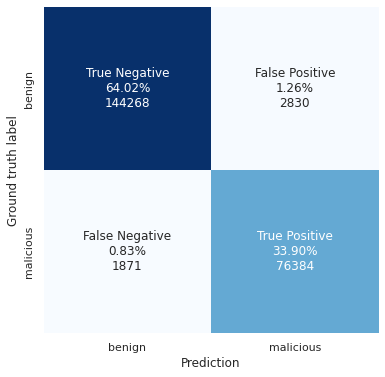

In [4]:
print_scores(yval_true, yval_pred)
draw_confusion_matrix(yval_true, yval_pred, counts=True)

F1:  0.9950992270999669
Recall:  0.9967073116205393
Precision:  0.9934963231783019
Accuracy:  99.65897908944976


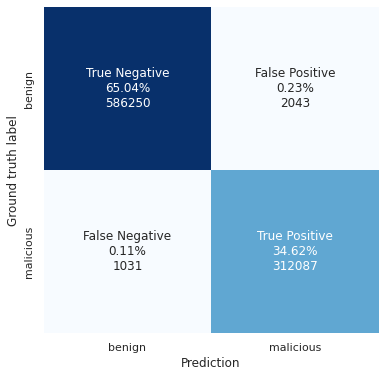

In [6]:
print_scores(y_true, y_pred)
draw_confusion_matrix(y_true, y_pred, counts=True)

## 5 epochs, default settings

In [4]:
set_seed(0)

device="cpu"

TIMESTAMP = "1645008179"
model_path = [x for x in os.listdir(".") if ".torch" in x and "ep5" in x][0]
bytes_used = [x for x in os.listdir(".") if "keep_bytes" in x and TIMESTAMP in x][0]

with open(bytes_used, "rb") as f:
    keep_bytes = pickle.load(f)

model = Modular(vocab_size = len(keep_bytes) + 2,
        embedding_dim = 32,
        hidden_neurons = [128],
        batch_norm_ffnn = False
        ).to(device)

model_dict = torch.load(model_path, map_location=device)
model.load_state_dict(model_dict)

X = np.load([x for x in os.listdir() if "X-" in x and TIMESTAMP in x][0])
y = np.load([x for x in os.listdir() if "y-" in x and TIMESTAMP in x][0])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1763)

train_loader = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(torch.LongTensor(X_train),torch.LongTensor(y_train)),
        batch_size = 1024, shuffle=True)

model.eval()
y_pred = torch.Tensor()
y_true = torch.Tensor()
for batch_idx, (data, target) in enumerate(train_loader):
        print(f"{batch_idx}/{len(train_loader)}", end=" ")
        data, target = data.to(device), target.to(device)
        with torch.no_grad():
            logits = model(data)
        
        preds = torch.argmax(logits, dim=1).flatten()
        y_pred = torch.hstack([y_pred, preds])
        y_true = torch.hstack([y_true, target])

0/881 1/881 2/881 3/881 4/881 5/881 6/881 7/881 8/881 9/881 10/881 11/881 12/881 13/881 14/881 15/881 16/881 17/881 18/881 19/881 20/881 21/881 22/881 23/881 24/881 25/881 26/881 27/881 28/881 29/881 30/881 31/881 32/881 33/881 34/881 35/881 36/881 37/881 38/881 39/881 40/881 41/881 42/881 43/881 44/881 45/881 46/881 47/881 48/881 49/881 50/881 51/881 52/881 53/881 54/881 55/881 56/881 57/881 58/881 59/881 60/881 61/881 62/881 63/881 64/881 65/881 66/881 67/881 68/881 69/881 70/881 71/881 72/881 73/881 74/881 75/881 76/881 77/881 78/881 79/881 80/881 81/881 82/881 83/881 84/881 85/881 86/881 87/881 88/881 89/881 90/881 91/881 92/881 93/881 94/881 95/881 96/881 97/881 98/881 99/881 100/881 101/881 102/881 103/881 104/881 105/881 106/881 107/881 108/881 109/881 110/881 111/881 112/881 113/881 114/881 115/881 116/881 117/881 118/881 119/881 120/881 121/881 122/881 123/881 124/881 125/881 126/881 127/881 128/881 129/881 130/881 131/881 132/881 133/881 134/881 135/881 136/881 137/881 138/88

In [5]:
val_loader = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(torch.LongTensor(X_val),torch.LongTensor(y_val)),
        batch_size = 1024, shuffle=True)

model.eval()
yval_pred = torch.Tensor()
yval_true = torch.Tensor()
for batch_idx, (data, target) in enumerate(val_loader):
        print(f"{batch_idx}/{len(val_loader)}", end=" ")
        data, target = data.to(device), target.to(device)
        with torch.no_grad():
            logits = model(data)
        
        preds = torch.argmax(logits, dim=1).flatten()
        yval_pred = torch.hstack([yval_pred, preds])
        yval_true = torch.hstack([yval_true, target])

0/221 1/221 2/221 3/221 4/221 5/221 6/221 7/221 8/221 9/221 10/221 11/221 12/221 13/221 14/221 15/221 16/221 17/221 18/221 19/221 20/221 21/221 22/221 23/221 24/221 25/221 26/221 27/221 28/221 29/221 30/221 31/221 32/221 33/221 34/221 35/221 36/221 37/221 38/221 39/221 40/221 41/221 42/221 43/221 44/221 45/221 46/221 47/221 48/221 49/221 50/221 51/221 52/221 53/221 54/221 55/221 56/221 57/221 58/221 59/221 60/221 61/221 62/221 63/221 64/221 65/221 66/221 67/221 68/221 69/221 70/221 71/221 72/221 73/221 74/221 75/221 76/221 77/221 78/221 79/221 80/221 81/221 82/221 83/221 84/221 85/221 86/221 87/221 88/221 89/221 90/221 91/221 92/221 93/221 94/221 95/221 96/221 97/221 98/221 99/221 100/221 101/221 102/221 103/221 104/221 105/221 106/221 107/221 108/221 109/221 110/221 111/221 112/221 113/221 114/221 115/221 116/221 117/221 118/221 119/221 120/221 121/221 122/221 123/221 124/221 125/221 126/221 127/221 128/221 129/221 130/221 131/221 132/221 133/221 134/221 135/221 136/221 137/221 138/22

F1:  0.9622073102931099
Recall:  0.9544941514467474
Precision:  0.9700461430172841
Accuracy:  97.40584771447462


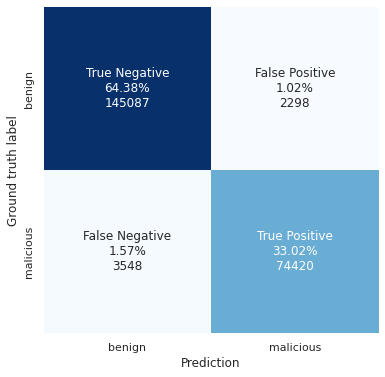

In [6]:
print_scores(yval_true, yval_pred)
draw_confusion_matrix(yval_true, yval_pred, counts=True)

F1:  0.9620838441267604
Recall:  0.9540594438506086
Precision:  0.9702443725521372
Accuracy:  97.38543239432401


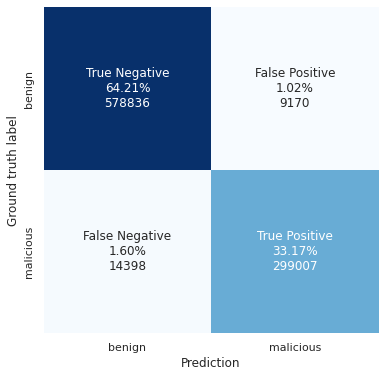

In [7]:
print_scores(y_true, y_pred)
draw_confusion_matrix(y_true, y_pred, counts=True)

# Plotting losses and metrics

In [7]:
def get_content(pattern, path="."):
    files = os.listdir(path)
    matches = [x for x in files if pattern in x]
    print(f"Found {len(matches)} matches: {matches}")
    name = matches[0]
    if name.endswith("npy"):
        return np.load(path+"/"+name)
    elif name.endswith("pickle"):
        with open(path+"/"+name, "rb") as f:
            return pickle.load(f)

def plot_lists(lists, legend=[], 
                legend_title="",
                figsize=(14,6), 
                subplots=(1,1),
                ax=None,
                ):
    if not ax:
        _, ax = plt.subplots(*subplots, figsize=figsize)
    [ax.plot(x) for x in lists]
    ax.legend(legend, title=legend_title)
    return ax


In [8]:
train_loss = {}
val_loss = {}
train_metrics = {}
val_metrics = {}
duration = {}


prefix_default = "ep5-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_fFalse-ffnn128"
val_loss["default"] = get_content(f"{prefix_default}-val_losses")
train_loss["default"] = get_content(f"{prefix_default}-train_losses")
val_metrics["default"] = get_content(f"{prefix_default}-val_metrics")
train_metrics["default"] = get_content(f"{prefix_default}-train_metrics")
duration["default"] = get_content(f"{prefix_default}-duration")

prefix_ep100 = "ep100-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed64-kb150-pl100_model-conv128-bn_cFalse_fTrue-ffnn512_256_64"
val_loss["deep_ffn"] = get_content(f"{prefix_ep100}-val_losses")
train_loss["deep_ffn"] = get_content(f"{prefix_ep100}-train_losses")
val_metrics["deep_ffn"] = get_content(f"{prefix_ep100}-val_metrics")
train_metrics["deep_ffn"] = get_content(f"{prefix_ep100}-train_metrics")
duration["deep_ffn"] = get_content(f"{prefix_ep100}-duration")

Found 1 matches: ['ep5-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_fFalse-ffnn128-val_losses.pickle']
Found 1 matches: ['ep5-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_fFalse-ffnn128-train_losses.pickle']
Found 1 matches: ['ep5-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_fFalse-ffnn128-val_metrics.pickle.npy']
Found 1 matches: ['ep5-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_fFalse-ffnn128-train_metrics.pickle.npy']
Found 1 matches: ['ep5-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_fFalse-ffnn128-duration.pickle']
Found 1 matches: ['ep100-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed64-kb150-pl100_model-conv128-bn_cFalse_fTrue-ffnn512_256_64-val_losses.pickle']
Found 1 matches: ['ep100-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed64-kb150-pl100_model-conv128-bn_cFalse_fTrue-ffnn512_256_64-train_losses.pickle']
Found 1 matches: ['ep100-

<AxesSubplot:>

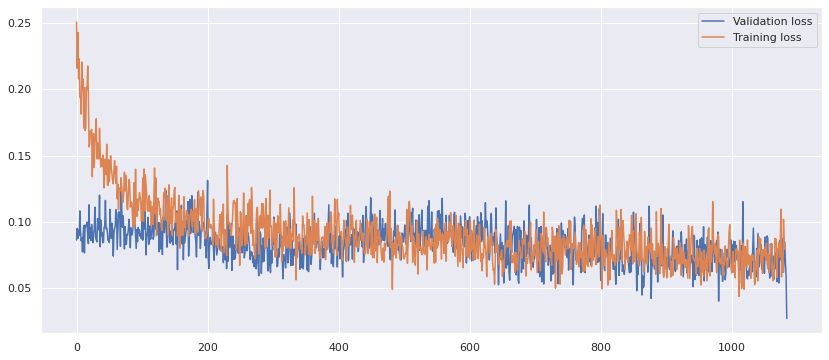

In [9]:
n = round(len(list(train_loss.values())[0])/len(list(val_loss.values())[0]))
plot_lists([list(val_loss.values())[0][20:]] + [list(train_loss.values())[0][::n][20:]], legend=["Validation loss", "Training loss"])

<AxesSubplot:>

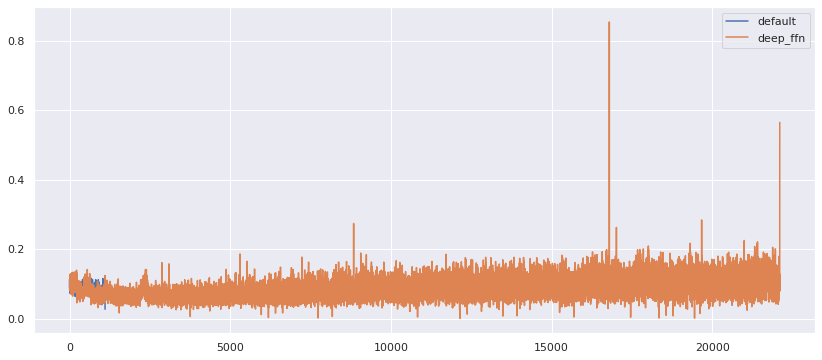

In [11]:
plot_lists(list(val_loss.values()), legend=list(val_loss.keys()))

<AxesSubplot:>

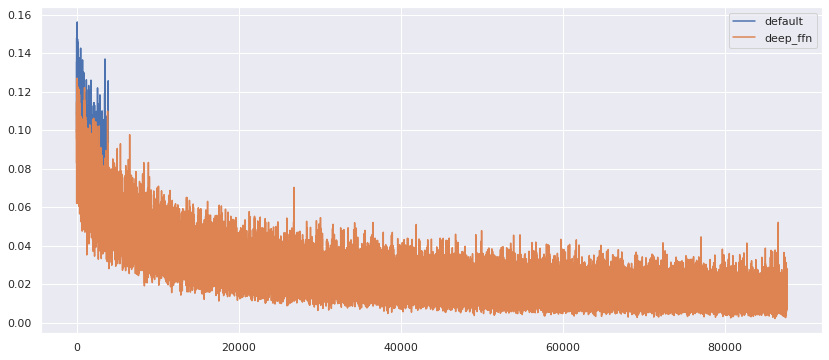

In [12]:
plot_lists([x[500:] for x in train_loss.values()], legend=list(train_loss.keys()))

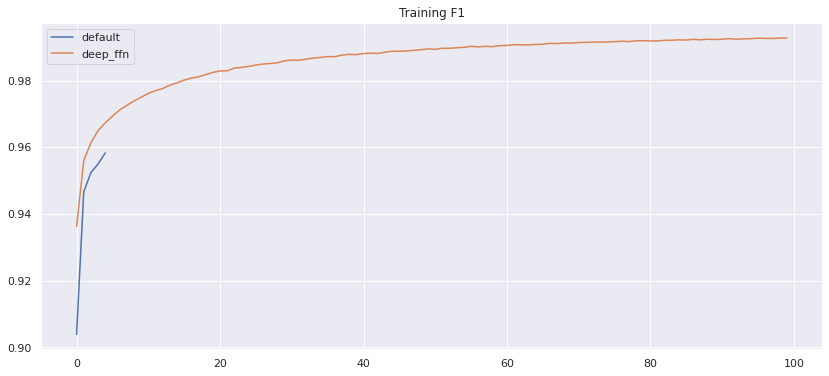

In [10]:
ax = plot_lists([x[:,1] for x in train_metrics.values()], legend=train_metrics.keys())
_ = ax.set_title("Training F1")